In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
calories = pd.read_csv('/content/calories.csv')

In [82]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [83]:
exercise = pd.read_csv('/content/exercise.csv')

In [84]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [85]:
calories_data = pd.concat([exercise,calories['Calories']],axis =1)

In [86]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [87]:
calories_data.shape

(15000, 9)

In [88]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [89]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [90]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [91]:
sns.set()

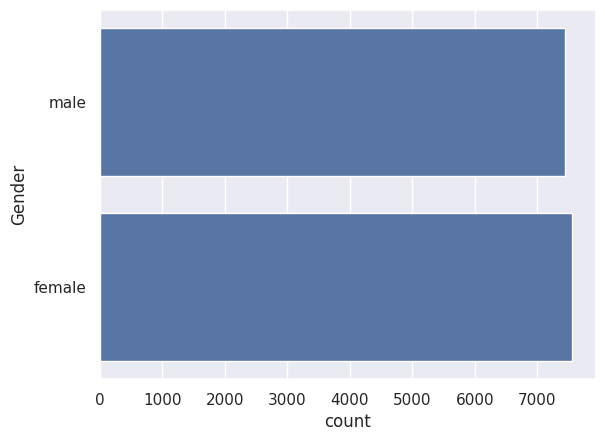

In [92]:
sns.countplot(calories_data['Gender'])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

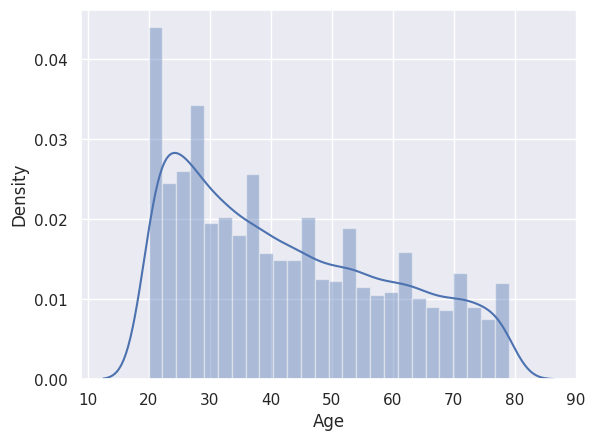

In [93]:
sns.distplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Density'>

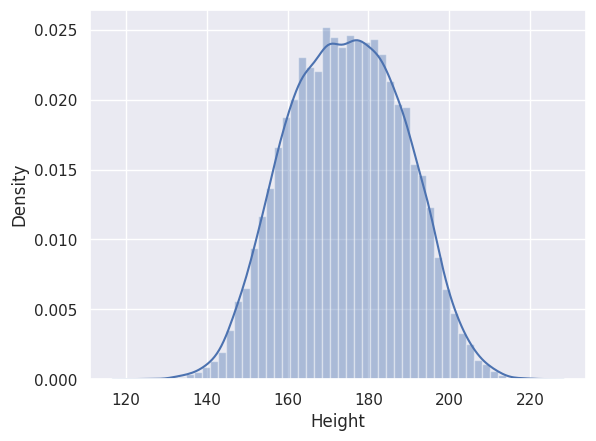

In [94]:
sns.distplot(calories_data['Height'])

<Axes: xlabel='Heart_Rate', ylabel='Density'>

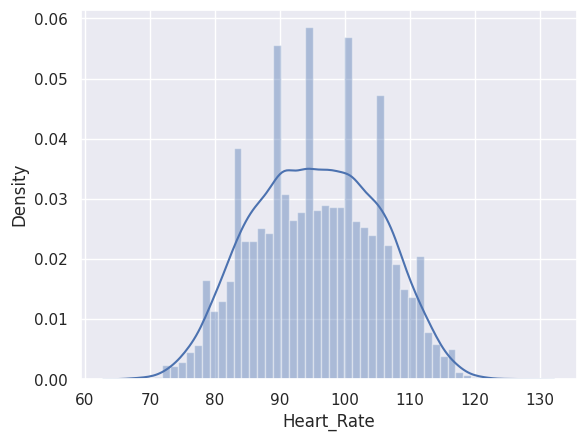

In [95]:
sns.distplot(calories_data['Heart_Rate'])

In [96]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [97]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [98]:
X = calories_data.drop(columns = 'Calories',axis =1)
Y = calories_data['Calories']

In [99]:
print(X)
print(Y)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363       0   68   190.0    94.0      29.0       105.0       40.8
1      14861698       1   20   166.0    60.0      14.0        94.0       40.3
2      11179863       0   69   179.0    79.0       5.0        88.0       38.7
3      16180408       1   34   179.0    71.0      13.0       100.0       40.5
4      17771927       1   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082       1   20   193.0    86.0      11.0        92.0       40.4
14996  17212577       1   27   165.0    65.0       6.0        85.0       39.2
14997  17271188       1   43   159.0    58.0      16.0        90.0       40.1
14998  18643037       0   78   193.0    97.0       2.0        84.0       38.3
14999  11751526       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]
0        231.0
1         66.0
2       

In [100]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [101]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


In [102]:
model = XGBRegressor()

In [103]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [110]:
X_train_pred = model.predict(X_train)

In [105]:
print(X_train_pred)

[ 11.742706  37.242317  31.318651 ... 107.154564 179.42761   44.831123]


In [108]:
mae = mean_absolute_error(Y_train,X_train_pred)

In [109]:
print('The train data Mean Absolute Error: ',mae)

The train data Mean Absolute Error:  0.9740070718588928


In [112]:
X_test_pred = model.predict(X_test)

In [113]:
print(X_test_pred)

[122.1084   222.73364   38.985115 ... 144.76479   23.58275   90.93156 ]


In [114]:
mae = mean_absolute_error(Y_test,X_test_pred)

In [115]:
print('The test data Mean Absolute Error: ',mae)

The test data Mean Absolute Error:  1.57148710261782
